# Task 1 : Linear Regression | Employee Attrition Dataset
## Student Name & ID: Sugam Rijal | s8119387



### 1. Loading the dataset in Python

In [34]:
import pandas as pd
from pathlib import Path

# Loading the dataset
csv_path = Path("/Users/sugamrijal/Desktop/Datasets/emp_att.csv")

# Read CSV file
df = pd.read_csv(csv_path)

# Display first rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1276,Sales,2,5,Life Sciences,1,625,...,2,80,1,22,2,3,18,16,11,8
1,42,No,Travel_Frequently,458,Research & Development,26,5,Medical,1,1242,...,3,80,0,20,6,3,1,0,0,0
2,50,No,Travel_Rarely,1464,Research & Development,2,4,Medical,1,1061,...,4,80,1,29,2,2,8,1,7,7
3,45,No,Travel_Rarely,1329,Research & Development,2,2,Other,1,1635,...,1,80,2,10,3,3,10,7,3,9
4,36,No,Travel_Frequently,688,Research & Development,4,2,Life Sciences,1,2025,...,2,80,3,18,3,3,4,2,0,2


## 2. Exploratory Data Analysis (EDA)

In [4]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1044 non-null   int64 
 1   Attrition                 1044 non-null   object
 2   BusinessTravel            1044 non-null   object
 3   DailyRate                 1044 non-null   int64 
 4   Department                1044 non-null   object
 5   DistanceFromHome          1044 non-null   int64 
 6   Education                 1044 non-null   int64 
 7   EducationField            1044 non-null   object
 8   EmployeeCount             1044 non-null   int64 
 9   EmployeeNumber            1044 non-null   int64 
 10  EnvironmentSatisfaction   1044 non-null   int64 
 11  Gender                    1044 non-null   object
 12  HourlyRate                1044 non-null   int64 
 13  JobInvolvement            1044 non-null   int64 
 14  JobLevel                

In [5]:
# Dataset shape (total number of rows, columns)
df.shape

(1044, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
#total number of columns
print("the total number of columsn;", df.shape[1])

the total number of columsn; 35


In [8]:
#checking missing values | True - Missing value , False - No missing value
df.isnull().values.any()


np.False_

In [9]:
#Value Count per Category
df['Department'].value_counts()


Department
Research & Development    676
Sales                     324
Human Resources            44
Name: count, dtype: int64

In [10]:
#checking duplicate rows

print("\n Number of duplicate rows:", df.duplicated().sum())


 Number of duplicate rows: 0


In [11]:
# Generating descriptive statistics and highlight the minimum (red) and maximum (green) values for each numeric column.
df.describe().T.style.highlight_min(color="lightcoral").highlight_max(color="lightgreen")


,count,mean,std,min,25%,50%,75%,max
Age,1044.000000,36.843870,9.258385,18.000000,30.000000,36.000000,43.000000,60.000000
DailyRate,1044.000000,798.608238,406.384832,102.000000,464.000000,783.000000,1158.250000,1499.000000
DistanceFromHome,1044.000000,9.242337,8.136874,1.000000,2.000000,7.000000,14.000000,29.000000
Education,1044.000000,2.889847,1.032702,1.000000,2.000000,3.000000,4.000000,5.000000
EmployeeCount,1044.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeNumber,1044.000000,1025.867816,604.136556,1.000000,484.750000,1017.500000,1570.750000,2068.000000
EnvironmentSatisfaction,1044.000000,2.735632,1.093445,1.000000,2.000000,3.000000,4.000000,4.000000
HourlyRate,1044.000000,65.270115,20.461545,30.000000,48.000000,65.000000,83.000000,100.000000
JobInvolvement,1044.000000,2.748084,0.705237,1.000000,2.000000,3.000000,3.000000,4.000000
JobLevel,1044.000000,2.063218,1.108594,1.000000,1.000000,2.000000,3.000000,5.000000


#### From the descriptive statistics above, most values appear consistent with a typical workforce dataset. Below is the breakdown:

* Age range (18–60) is realistic for a workforce dataset.

* Salary variables such as MonthlyIncome (1,009–19,999) and MonthlyRate (2,094–26,999) are within plausible bounds, with higher values likely linked to senior positions.

* PerformanceRating only varies between 3 and 4, indicating limited differentiation in performance assessments.

* StandardHours is constant at 80 across all employees, offering no analytical value and can be removed.

* YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager include zeros, which are expected for new hires but important to track in attrition analysis.

Overall, there are no extreme anomalies, but variables with little or no variation may not add value to predictive modeling.

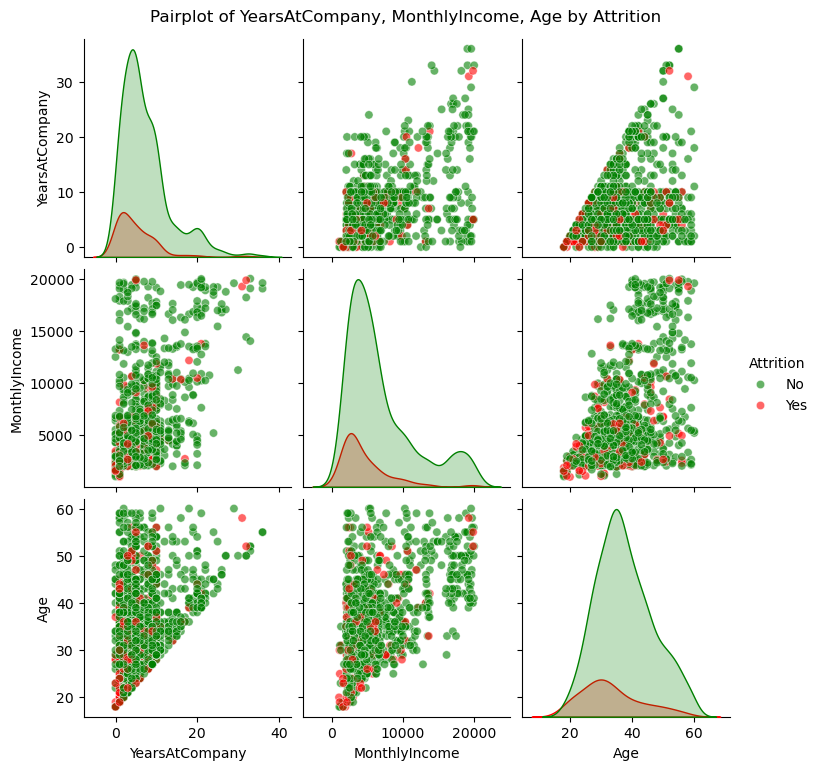

In [12]:
# Create a pairplot to explore relationships between YearsAtCompany, MonthlyIncome, and Age, 
# highlighting differences between employees who left (Attrition = Yes) and those who stayed (Attrition = No). 
# Distributions are shown on the diagonal (KDE), and scatterplots compare variables pairwise with color-coded attrition.

import seaborn as sns
import matplotlib.pyplot as plt

# Columns to include
cols = ['YearsAtCompany', 'MonthlyIncome', 'Age', 'Attrition']  # Fixed 'MonthlyColumn' to 'MonthlyIncome'

# Pairplot with hue as Attrition
sns.pairplot(
    df[cols],
    hue='Attrition',
    palette={'Yes':'red','No':'green'},
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)

plt.suptitle("Pairplot of YearsAtCompany, MonthlyIncome, Age by Attrition", y = 1.02)
plt.show()


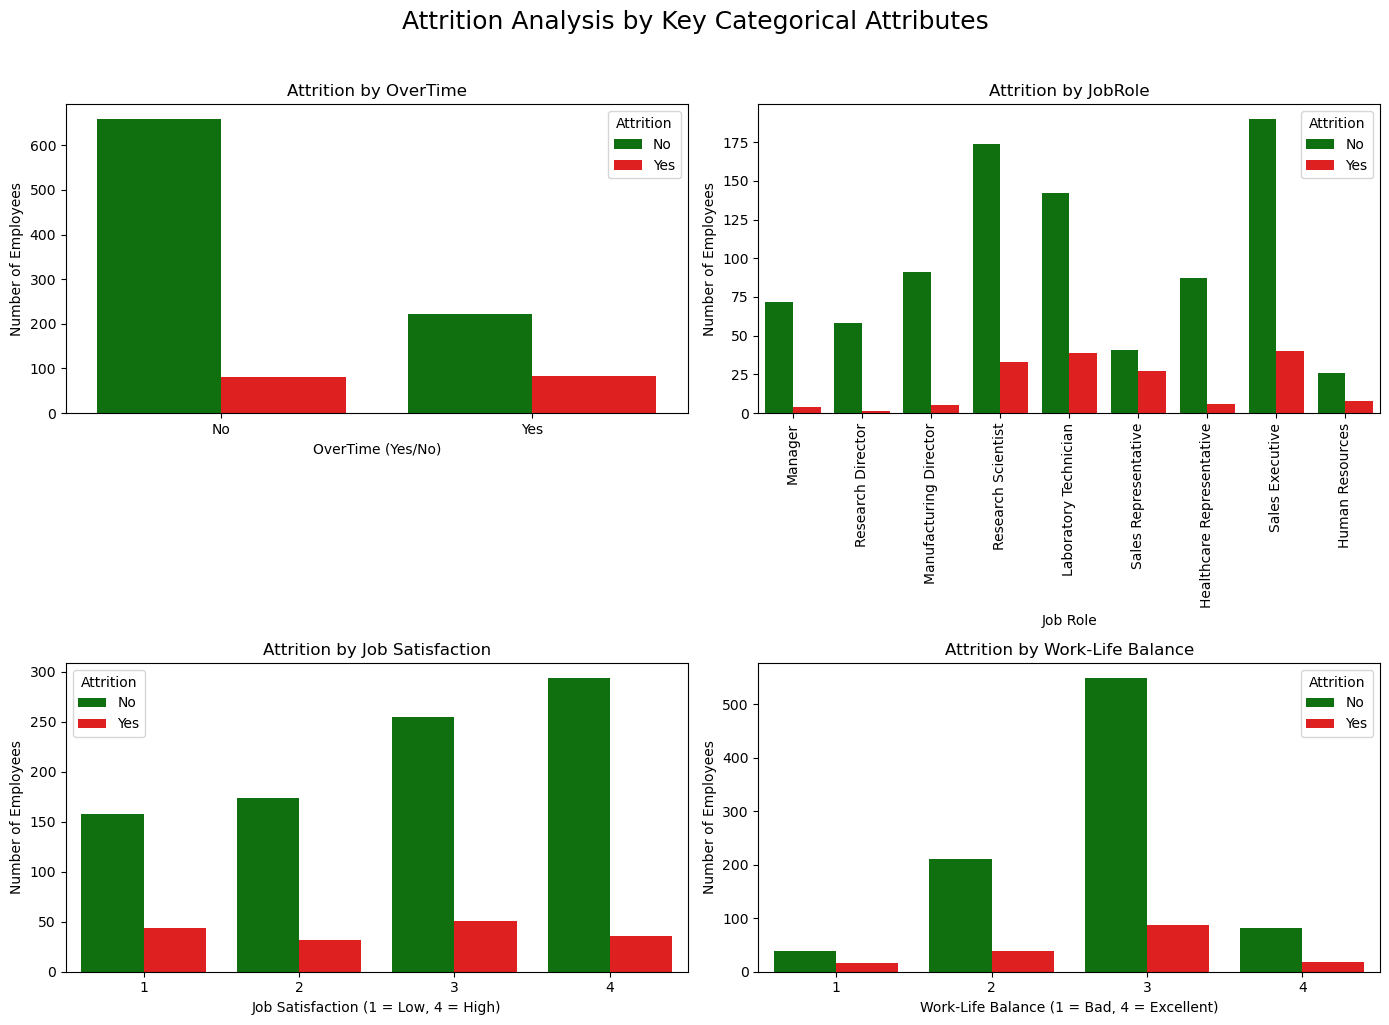

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = {'Yes':'red', 'No':'green'}

# Create figure with subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Attrition Analysis by Key Categorical Attributes", fontsize=18, y=1.02)

# 1. Attrition by OverTime
sns.countplot(data=df, x='OverTime', hue='Attrition', palette=palette, ax=axes[0,0])
axes[0,0].set_title("Attrition by OverTime")
axes[0,0].set_xlabel("OverTime (Yes/No)")
axes[0,0].set_ylabel("Number of Employees")

# 2. Attrition by JobRole
sns.countplot(data=df, x='JobRole', hue='Attrition', palette=palette, ax=axes[0,1])
axes[0,1].set_title("Attrition by JobRole")
axes[0,1].set_xlabel("Job Role")
axes[0,1].set_ylabel("Number of Employees")
axes[0,1].tick_params(axis='x', rotation=90)

# 3. Attrition by JobSatisfaction
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette=palette, ax=axes[1,0])
axes[1,0].set_title("Attrition by Job Satisfaction")
axes[1,0].set_xlabel("Job Satisfaction (1 = Low, 4 = High)")
axes[1,0].set_ylabel("Number of Employees")

# 4. Attrition by WorkLifeBalance
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette=palette, ax=axes[1,1])
axes[1,1].set_title("Attrition by Work-Life Balance")
axes[1,1].set_xlabel("Work-Life Balance (1 = Bad, 4 = Excellent)")
axes[1,1].set_ylabel("Number of Employees")

plt.tight_layout()
plt.show()


The bar plots reveal that attrition is notably higher among employees who work OverTime, suggesting workload pressures play a strong role in turnover. Differences are also visible across JobRoles, with certain roles showing higher attrition compared to others. Low levels of JobSatisfaction and poor WorkLifeBalance are both associated with more employees leaving, while higher satisfaction and balance ratings correspond to lower attrition. Overall, these results indicate that factors related to workload, role type, and employee satisfaction are key drivers of attrition.

## 2.1 Is there any anomaly (abnormal data or missed values) in the data set?



Based on the exploratory checks performed, there are no missing values in the dataset. A df.isnull().values.any() check returned False, and a column-wise summary (df.isnull().sum()) confirmed zero nulls across all fields. This means the dataset is complete in terms of missing entries.

Upon examination of descriptive statistics (df.describe()), the majority of variables had plausible ranges. For instance, 

* Age (18–60) is within the usual workforce age, while TotalWorkingYears (0–40) falls within possible professional tenures.
* Salary-driven variables like MonthlyIncome (1,009–19,999) and MonthlyRate (2,094–26,999) also fall within reasonable limits, and the larger values are probably of the senior

Some of these, though, imply restricted variation or even possible anomalies:

* PerformanceRating lies between just 3 and 4, and its variation does not discriminate much and may capture rating inflation or policy limitations.

* StandardHours is the same 80 hours for everyone, so it adds nothing to the analytic content and can be dropped.

* YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager contain zeroes, which are permissible for new hires but need to be treated carefully when building attrition models.

On the whole, there are no extreme anomalies like unrealistic ages, negative salaries, or implausible logical connections between tenure-related variables. The data are reasonably clean, although some variables with no or negligible variation (e.g., StandardHours, EmployeeCount, PerformanceRating) might not be of much value in predictive analysis.

##  2.2  List two possible strategies to handle cases with missing values in data (if applicable) & provide appropriate reasoning? 




**1. Imputation (Filling Missing Values)**

* **Numerical variables:** Fill in the missing values with the mean or the median. The median is usually favored if the data is skewed (e.g., salaries).

* **Categorical variables:** Fill in the missing values using the mode (most common category) or assign a special category such as "Unknown".

**Reasoning:** The strategy maintains the number of datasets and enables models to access all the available records, avoiding record loss from row dropping.

**2. Deletion (Removing Records or Columns)**

* **Row dropping:** Remove rows if they contain missing values and they constitute just a negligible proportion of the data set (<5%).

* **Column deletion:** Remove entire columns if the proportion of missing values is very high (e.g., >50%) and the variable adds little analytical value.

**Reasoning:** This avoids the introduction of bias by imputation, especially when the missing data are so extensive they cannot be sensibly estimated or are uninformative about the problem.


# 3. Developing a Logistic Regression Model

## 3.1 Building Logistic Regression Model

#### ➡️ 3.1.1 Load & Check 

In [14]:
#importing libraries

import pandas as pd
import numpy as np
from pathlib import Path

# Model + pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Metrics & plots
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load data

csv_path = Path("/Users/sugamrijal/Desktop/Datasets/emp_att.csv")  # <-- update if needed
df = pd.read_csv(csv_path)


#### ➡️ 3.1.2 Clean target (Attrition -> 1/0) and drop junk columns


In [15]:
df["Attrition"] = df["Attrition"].astype(str).str.strip().str.title()
df = df[df["Attrition"].isin(["Yes", "No"])].copy()
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0}).astype(int)

drop_cols = ["EmployeeNumber", "EmployeeCount", "StandardHours"]  # IDs/constants
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")


#### ➡️ 3.1.3 Split Features/Target & Pre-processing Numeric & Categorical values

In [16]:
# 3) Split features/target
# -------------------------
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# -------------------------
# 4) Preprocess: numeric (impute+scale), categorical (impute+onehot)
#     – imputation included for robustness even if your data has no NaNs
# -------------------------
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop=None, sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ],
    remainder="drop"
)

#### ➡️ 3.1.4 Building Model Pipleline > Training > Testing

In [17]:
# 5) Building model pipeline

# -------------------------
clf = Pipeline(steps=[
    ("prep", preprocess),
    ("lr", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# 6) Train
# -------------------------
clf.fit(X_train, y_train)


# 7) Predict & evaluate
# -------------------------
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

#### ➡️ 3.1.5 Visualizations (Confusion Matrix, ROC, Factors affecting Attrition)


1) Confusion Matrix


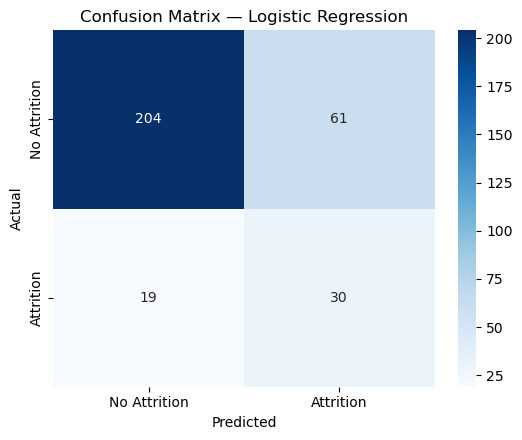


Classification Report:
              precision    recall  f1-score   support

           0      0.915     0.770     0.836       265
           1      0.330     0.612     0.429        49

    accuracy                          0.745       314
   macro avg      0.622     0.691     0.632       314
weighted avg      0.823     0.745     0.772       314



In [18]:
# 1) CONFUSION MATRIX

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

print("\n" + "="*70)
print("1) Confusion Matrix")
print("="*70)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5.5,4.5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Attrition","Attrition"],
            yticklabels=["No Attrition","Attrition"])
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))


### 🔹  Confusion Matrix 

* Top-left (204) → Correctly predicted employees who did not leave (true negatives).
* Top-right (61) → Incorrectly predicted as attrition when they actually stayed (false positives).
* Bottom-left (19) → Employees who actually left but were predicted as stayers (false negatives).
* Bottom-right (30) → Correctly predicted employees who left (true positives).

The model is better at predicting “No Attrition” than “Attrition” (common with imbalanced data).

### 🔹 Classification Report

* Class 0 (No Attrition)
  - Precision = 0.915 → When the model predicts “No Attrition,” it’s correct ~92% of the time.
  - Recall = 0.770 → It correctly identifies ~77% of the stayers.
  - F1 = 0.836 → Good balance between precision and recall.

* Class 1 (Attrition)

  - Precision = 0.330 → When the model predicts “Attrition,” it’s correct only ~33% of the time.
  - Recall = 0.612 → It captures ~61% of actual leavers.
  - F1 = 0.429 → Performance is modest because of class imbalance.

Overall

### Accuracy = 0.745 → About 75% of predictions are correct.
- Macro Avg (treats both classes equally) → F1 ≈ 0.63, showing weaker performance for attrition.
- Weighted Avg (accounts for imbalance) → F1 ≈ 0.77, pulled up by strong performance on “No Attrition.”


2) ROC Curve
ROC AUC: 0.767


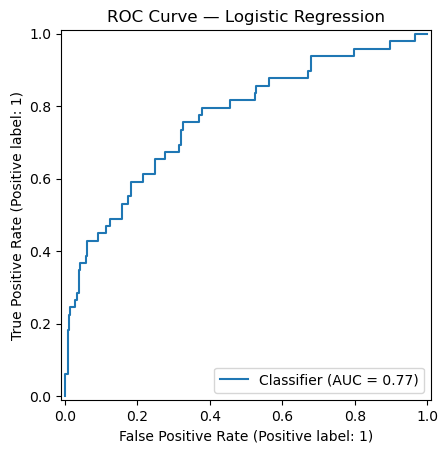

In [19]:
print("\n" + "="*70)
print("2) ROC Curve")
print("="*70)

auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {auc:.3f}")
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve — Logistic Regression")
plt.show()


### 📈 ROC Curve Interpretation

- The ROC curve shows the **trade-off between True Positive Rate (Recall)** 
  and **False Positive Rate** at different classification thresholds.  
- The diagonal line represents **random guessing (AUC = 0.5)**.  
- Your model achieved **ROC AUC = {auc:.3f}**, which means:  

  - There is about a **{auc*100:.1f}% chance** the model will rank a randomly chosen employee who left 
    higher than a randomly chosen employee who stayed.  
  - The curve bends above the diagonal, showing the model has **discriminatory power** 
    (better than random at separating Attrition vs. No Attrition).  
  - However, since AUC < 0.8, the model is **moderately effective** — 
    good at identifying stayers, but weaker at consistently identifying leavers.  

👉 In HR terms: the model is **useful for early attrition signals**, but may need improvement 
(e.g., threshold tuning, SMOTE, or advanced models like Random Forest/XGBoost) 
to catch more employees at risk of leaving.
"""

### ------------------------------------------------------------------------------------------------------

### Q. Which are the condition(s) that will likely lead to employee attrition? Explain. 

#### (Visualiation + Explanation)


In [20]:
# 3) TOP FACTORS INCREASING ATTRITION
# =========================================================
print("\n" + "="*70)
print("3) Top Factors Increasing Attrition (odds_ratio > 1)")
print("="*70)

# Get one-hot feature names after preprocessing (handles no-categorical case)
oh = None
cat_feature_names = np.array([])
if "prep" in clf.named_steps and "cat" in clf.named_steps["prep"].named_transformers_:
    cat_trans = clf.named_steps["prep"].named_transformers_["cat"]
    if hasattr(cat_trans, "named_steps") and "onehot" in cat_trans.named_steps:
        oh = cat_trans.named_steps["onehot"]
        cat_feature_names = oh.get_feature_names_out(cat_cols) if len(cat_cols) else np.array([])

feature_names = np.r_[num_cols, cat_feature_names]
coefs = clf.named_steps["lr"].coef_[0]
odds = np.exp(coefs)

feat_importance = (
    pd.DataFrame({"feature": feature_names, "coef": coefs, "odds_ratio": odds})
      .sort_values("odds_ratio", ascending=False)
)

display(
    feat_importance[feat_importance["odds_ratio"]>1]
      .head(12)
      .style.format({"coef":"{:.3f}","odds_ratio":"{:.2f}"})
      .background_gradient(cmap="Reds")
)


3) Top Factors Increasing Attrition (odds_ratio > 1)


,feature,coef,odds_ratio
48,MaritalStatus_Single,1.076,2.93
34,EducationField_Technical Degree,1.064,2.90
45,JobRole_Sales Representative,0.891,2.44
51,OverTime_Yes,0.869,2.38
39,JobRole_Laboratory Technician,0.804,2.23
24,BusinessTravel_Travel_Frequently,0.764,2.15
38,JobRole_Human Resources,0.714,2.04
21,YearsSinceLastPromotion,0.531,1.70
7,JobLevel,0.463,1.59
19,YearsAtCompany,0.416,1.52


### 🔹 Top Factors Increasing Attrition (Odds Ratio > 1)

The features with an **odds ratio greater than 1** are those that **increase the likelihood of employee attrition**.  

This table highlights the **top factors that increase attrition**, where higher odds ratios indicate a **stronger likelihood of leaving**.  

- Employees who are **Single (OR ≈ 2.93)**  
- Employees with a **Technical Degree (OR ≈ 2.90)**  
- Employees working as **Sales Representatives (OR ≈ 2.44)**  
- Employees working **OverTime (OR ≈ 2.38)**  
- Roles such as **Laboratory Technicians (OR ≈ 2.23)** and **Human Resources (OR ≈ 2.04)**  

Other contributing factors include **frequent business travel**, **longer time since last promotion**, and **lower job level**.  

Overall, this suggests that **personal status**, **education background**, **job role**, **workload**, and **career progression opportunities** are **key drivers of attrition**.


### -----------------------------------------------------------------------------------------------------------------------

### Q. Which are the factors that matter when retaining employees? Explain. 


#### (Visualiation + Explanation)


In [21]:
# 4) TOP FACTORS REDUCING ATTRITION
# =========================================================
print("\n" + "="*70)
print("4) Top Factors Reducing Attrition (odds_ratio < 1)")
print("="*70)

display(
    feat_importance[feat_importance["odds_ratio"]<1]
      .tail(12)
      .sort_values("odds_ratio", ascending=True)
      .style.format({"coef":"{:.3f}","odds_ratio":"{:.2f}"})
      .background_gradient(cmap="Greens")
)


4) Top Factors Reducing Attrition (odds_ratio < 1)


,feature,coef,odds_ratio
37,JobRole_Healthcare Representative,-1.334,0.26
23,BusinessTravel_Non-Travel,-1.051,0.35
29,EducationField_Human Resources,-0.969,0.38
46,MaritalStatus_Divorced,-0.903,0.41
50,OverTime_No,-0.873,0.42
42,JobRole_Research Director,-0.710,0.49
16,TotalWorkingYears,-0.636,0.53
22,YearsWithCurrManager,-0.513,0.60
9,MonthlyIncome,-0.488,0.61
4,EnvironmentSatisfaction,-0.389,0.68




### 🔹 Top Factors Reducing Attrition (Odds Ratio < 1)

The features with an **odds ratio less than 1** are associated with a **lower likelihood of employee attrition**, meaning they act as **retention factors**. Employees with **higher monthly income**, **more years at the company**, and **higher job levels** are less likely to leave. Similarly, **longer tenure with the same manager** and a **shorter time since last promotion** also reduce attrition risk. In general, factors linked to **career stability**, **growth opportunities**, and **financial security** play an important role in encouraging employees to stay with the organization.

This table highlights the **top factors that reduce employee attrition**, where lower odds ratios (<1) indicate **stronger employee retention**.  

- Employees working as **Healthcare Representatives (OR ≈ 0.26)**  
- Those with **non-travel jobs (OR ≈ 0.35)**  
- Employees in **Human Resources (OR ≈ 0.38)**  
- Employees who are **divorced (OR ≈ 0.41)**  
- Those working with **no overtime (OR ≈ 0.42)**  

From a career perspective, **senior roles such as Research Directors**, along with **longer total working years**, **more years with the current manager**, and **higher monthly income**, all significantly reduce the likelihood of turnover.  

Finally, positive workplace factors such as **higher environment satisfaction**, **stronger job involvement**, and **greater job satisfaction** further **enhance employee retention**.


### -----------------------------------------------------------------------------------------------------------------------

### Based on the conducted analysis, what other value added observations can you make? 



#### 🔹 Additional Value-Added Observations

- **Imbalance in Attrition Classes**: The dataset is heavily skewed toward employees who stay, which makes the model biased toward predicting “No Attrition.” This highlights the importance of resampling techniques (e.g., SMOTE) or threshold tuning to better capture true leavers.  

- **Workload and Overtime**: Overtime is a consistent driver of attrition, while “No Overtime” strongly reduces turnover. This suggests workload management and flexible scheduling could directly impact retention.  

- **Career Progression Matters**: Employees with **longer time since last promotion** or those at **lower job levels** show higher attrition, indicating a need for clear career paths and development opportunities.  

- **Income and Financial Security**: Higher **monthly income** and senior roles (e.g., Research Directors) are associated with reduced attrition. Compensation and benefits remain strong levers for retention.  

- **Job Role & Travel Demands**: Certain roles (e.g., **Sales Representatives, Laboratory Technicians**) and frequent business travel show higher turnover risk, suggesting that job design and travel expectations could be reviewed.  

- **Satisfaction Factors**: Higher **environment satisfaction, job satisfaction, and job involvement** consistently reduce attrition. This reinforces the value of employee engagement initiatives and healthy workplace culture.  
